### 1. Exploración de datos

In [1]:
#Importando la librería pandas
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url ='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'
input = pd.read_csv(url)

### Estadística descriptiva

In [3]:
#Generamos una copia de la BD para trabajar sobre esta en todo el ejercicio
df = input.copy()
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
#¿falta algún dato?
df.isnull().values.any()

True

In [5]:
#Contar nulos por variable
df.isnull().sum().sort_values(ascending=True)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
carbo       1
sugars      1
potass      2
dtype: int64

In [6]:
#Se eliminan todas las observaciones con datos faltantes, ya que no considero que sean muchos
df.dropna(inplace = True)

In [7]:
#La función describe de pd, da una clara idea de la distribución ed las variables
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.520611
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [35]:
df_test=df[['type', 'sodium']]


In [27]:
df.describe(include=['object'])

,name,mfr,type
count,74,74,74
unique,74,7,2
top,100%_Bran,K,C
freq,1,23,73


In [28]:
#Para las variables categóricas:
mfr_count= df['mfr'].value_counts().to_frame()
mfr_count

,mfr
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


In [30]:
mfr_count.rename(columns={'mfr':'recuento'}, inplace=True)
mfr_count

,recuento
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


In [31]:
mfr_count.index.name='mfr'
mfr_count

,recuento
mfr,
K,23
G,22
P,9
Q,7
R,7
N,5
A,1


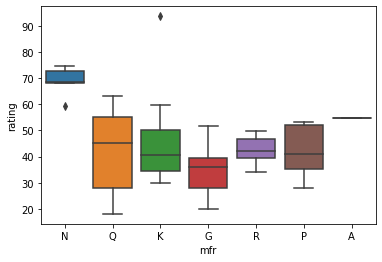

In [9]:
#BoxPlot
#Nos sirve para visualizar la distribución de los datos
sns.boxplot(x='mfr', y='rating', data=df)

Text(0, 0.5, 'Rating')

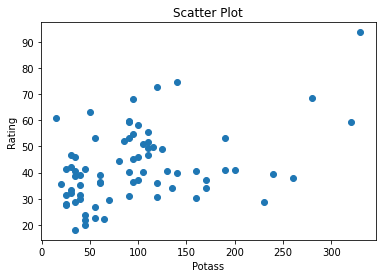

In [10]:
from seaborn.widgets import plt
#Scatter Plot
y=df['rating']
x=df['potass']
plt.scatter(x,y)
plt.title('Scatter Plot')
plt.xlabel('Potass')
plt.ylabel('Rating')

### Agrupando datos

In [11]:
df_seg=df[['shelf','type' ,'rating']]
df_grp = df_seg.groupby(['shelf', 'type'], as_index=False).mean()
df_grp

,shelf,type,rating
0,1,C,45.898968
1,2,C,32.370770
2,2,H,54.850917
3,3,C,45.529609


In [12]:
df_pivot= df_grp.pivot(index='shelf', columns='type')
df_pivot

rating           
type           C          H
shelf                      
1      45.898968        NaN
2      32.370770  54.850917
3      45.529609        NaN

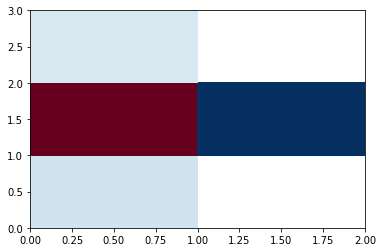

In [13]:
###Heatmap
plt.pcolor(df_pivot, cmap='RdBu')
plt.show()

### ANOVA

In [14]:
df_anova=df[['type' ,'rating']]
grouped_anova=df_anova.groupby(['type'])

In [15]:
from seaborn.distributions import stats
anova_result = stats.f_oneway(grouped_anova.get_group('C')['rating'], grouped_anova.get_group('H')['rating'])
anova_result

F_onewayResult(statistic=0.7993499907867339, pvalue=0.3742667086793767)

### Correlación

La correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables.

(0.0, 97.48801504999999)

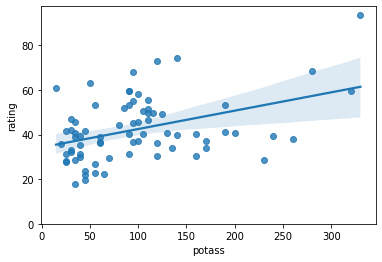

In [16]:
sns.regplot(x='potass', y='rating', data=df)
plt.ylim(0,)

Correlación de Pearson

1. -1 Corelación positiva
2. Correlación nula
3. +1 Correlación negativa

En cuanto al valor del p-value  

1. P- value < 0.001 Certeza fuerte
2. P- value < 0.05 Certeza moderada
3. P- value < 0.1 Certeza debil
3. P- value > 0.1 Sin Certeza

In [21]:
#Correlación de Pearson
pearson_coef, p_value=stats.pearsonr(df['potass'], df['rating'])  

In [26]:
print('Coeficiente de correlación:',pearson_coef)
print('P-value:', p_value)

Coeficiente de correlación: 0.41578244343009124
P-value: 0.00022952398281099486


### Evidencia

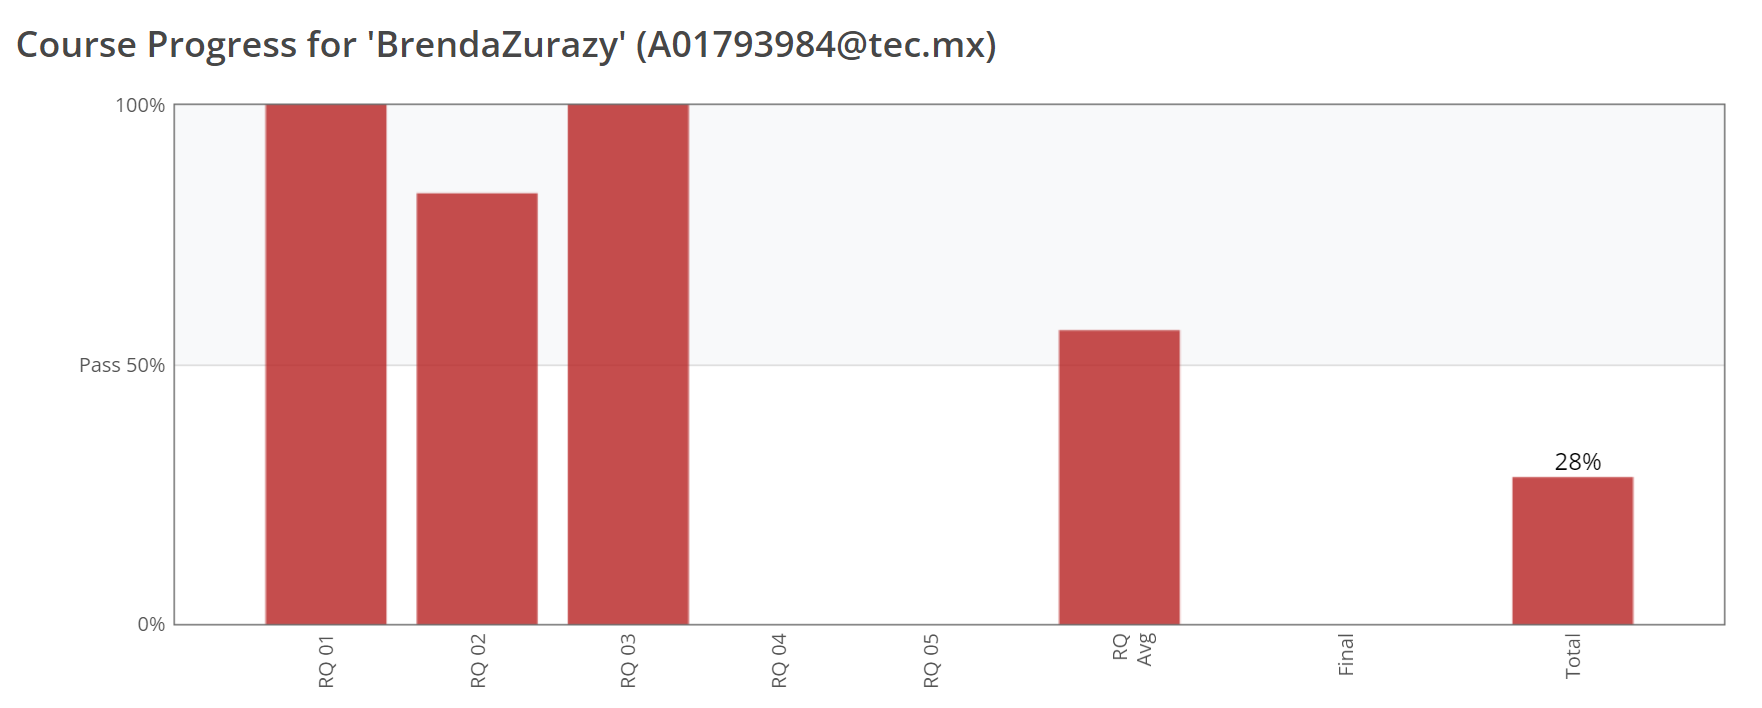